In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [37]:
# Set the paths for your dataset
train_dir = 'path/to/train_data'  # Replace with the path to your training data
validation_dir = 'path/to/validation_data'  # Replace with the path to your validation data
test_dir = 'path/to/test_data'  # Replace with the path to your test data

# Image dimensions
img_width, img_height = 150, 150  # Resize the images to 150x150

# Batch size and epochs
batch_size = 32
epochs = 20

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths to your data directories
train_dir = 'C:/Users/Shree/ID/train'
validation_dir = 'C:/Users/Shree/ID/validation'
test_dir = 'C:/Users/Shree/ID/test'

# Preprocess the image data using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=40,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Random shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'  # Fill any missing pixels after transformation
)

validation_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation

# Set image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Create generators for training, validation, and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # Since we're classifying two classes (apple and non-apple)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 191 images belonging to 2 classes.
Found 141 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


In [39]:
# Build the CNN model
model = Sequential([
    # First Convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    
    # Second Convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Third Convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Flattening the output to feed into Dense layers
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    
    # Output layer (binary classification: 0 for non-apple, 1 for apple)
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy for binary classification
              metrics=['accuracy'])


C:\Users\Shree\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [40]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 57s 7s/step - accuracy: 0.5006 - loss: 1.0246 - val_accuracy: 0.6406 - val_loss: 0.6290
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - accuracy: 0.3750 - loss: 0.4490 - val_accuracy: 0.0769 - val_loss: 0.3598
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.4610 - loss: 0.6926 - val_accuracy: 0.6875 - val_loss: 0.6360
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.8125 - loss: 0.3775 - val_accuracy: 0.6923 - val_loss: 0.3156
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.7381 - loss: 0.5936 - val_accuracy: 0.5703 - val_loss: 0.7652
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 408ms/step - accuracy: 0.6875 - loss: 0.3384 - val_accuracy: 0.5385 - val_loss: 0.5071
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.6983 - loss: 0.6047 - val_accuracy: 0.8438 - val_loss: 0.3860
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.8750 - loss: 0.2126 - val_accuracy: 1.0000 - val_loss: 0.0986


In [41]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Plot the training history
plt.figure(figsize=(12, 6))


4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.9302 - loss: 0.1535
Test accuracy: 91.41%


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

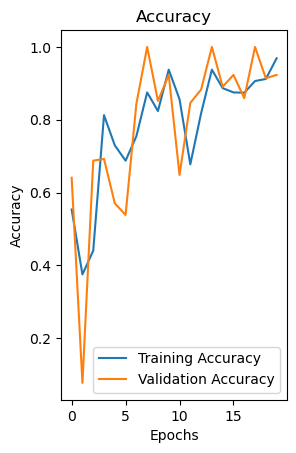

In [42]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

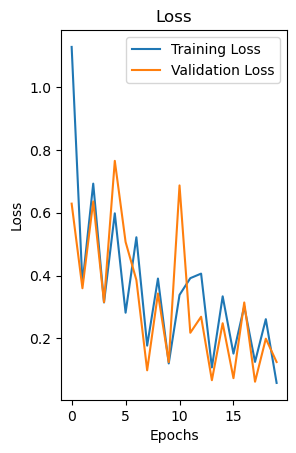

In [44]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [45]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

SyntaxError: invalid syntax (1646929880.py, line 1)